In [1]:
# %pip install universal-portfolios
%matplotlib inline

import numpy as np
import pandas as pd
# from pandas.io.data import DataReader
from datetime import datetime
# import six
import universal as up
from universal import tools
from universal import algos
import logging
# we would like to see algos progress
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.DEBUG)

import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['figure.figsize'] = (16, 10) # increase the size of graphs
# mpl.rcParams['legend.fontsize'] = 12
# mpl.rcParams['lines.linewidth'] = 1
# default_color_cycle = mpl.rcParams['axes.color_cycle'] # save this as we will want it back later

2019-11-18 21:27:35,201 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import pandas as pd
import numpy as np
# import xarray as xr
import os

df = {}
closes = {}
for i in range(10):
    data = pd.read_csv('./data/'+str(i)+'.csv')
    code = data.Code.unique()[0]
    time = pd.to_datetime(data.Date)
    # print(time)
    closes[code] = data.Close

c = pd.DataFrame(closes)


In [3]:
c = c.drop(c.tail(2).index)
print(c.head())
print(c.tail())
print(c.shape)

   JM.DCE   P.DCE  I.DCE   Y.DCE   C.DCE  PP.DCE   M.DCE  EG.DCE   L.DCE  \
0  1371.5  4248.0  835.0  5422.0  1940.0  8847.0  2788.0  4483.0  8185.0   
1  1372.5  4248.0  838.0  5418.0  1940.0  8877.0  2784.0  4483.0  8190.0   
2  1374.0  4242.0  836.0  5414.0  1939.0  8869.0  2784.0  4478.0  8185.0   
3  1373.0  4248.0  836.0  5414.0  1939.0  8887.0  2782.0  4484.0  8185.0   
4  1374.0  4248.0  835.0  5420.0  1939.0  8886.0  2789.0  4486.0  8180.0   

    J.DCE  
0  2135.5  
1  2137.5  
2  2136.5  
3  2137.0  
4  2134.5  
       JM.DCE   P.DCE  I.DCE   Y.DCE   C.DCE  PP.DCE   M.DCE  EG.DCE   L.DCE  \
27010  1219.5  5232.0  619.0  6258.0  1889.0  7950.0  2878.0  4571.0  7235.0   
27011  1219.5  5234.0  619.0  6258.0  1890.0  7948.0  2877.0  4572.0  7230.0   
27012  1219.5  5236.0  618.5  6258.0  1890.0  7948.0  2871.0  4572.0  7225.0   
27013  1218.0  5232.0  619.0  6256.0  1890.0  7948.0  2871.0  4571.0  7225.0   
27014  1218.0  5238.0  618.0  6258.0  1891.0  7952.0  2872.0  4570.0  7

2019-11-18 21:27:35,951 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2019-11-18 21:27:35,952 findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:35,953 findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:35,953 findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:35,955 findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-18 21:27:35,956 findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:35,957 findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2019-11-18 21:27:35,958 findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-18 21

2019-11-18 21:27:36,040 findfont: score(<Font 'Arimo' (Arimo-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,041 findfont: score(<Font 'Cabin' (Cabin-MediumItalic.otf) italic normal medium normal>) = 11.145
2019-11-18 21:27:36,042 findfont: score(<Font 'STIXNonUnicode' (STIXNonUnicode-Bold.otf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,043 findfont: score(<Font 'STIXIntegralsUpD' (STIXIntegralsUpD-Bold.otf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,044 findfont: score(<Font 'Go' (Go-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,046 findfont: score(<Font 'Gentium Book Basic' (GenBkBasR.ttf) normal normal book normal>) = 10.05
2019-11-18 21:27:36,048 findfont: score(<Font 'Noto Sans Arabic' (NotoSansArabic-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,049 findfont: score(<Font 'Accanthis ADF Std No3' (AccanthisADFStdNo3-Regular.otf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,050 fi

2019-11-18 21:27:36,133 findfont: score(<Font 'Baekmuk Dotum' (dotum.ttf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,135 findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,138 findfont: score(<Font 'GFS Solomos' (GFSSolomos.otf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,140 findfont: score(<Font 'FreeMono' (FreeMonoOblique.otf) oblique normal 400 normal>) = 11.05
2019-11-18 21:27:36,141 findfont: score(<Font 'STIXSizeTwoSym' (STIXSizeTwoSym-Regular.otf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,142 findfont: score(<Font 'Go' (Go-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,143 findfont: score(<Font 'Linux Biolinum Keyboard O' (LinBiolinum_K.otf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,146 findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,148 findfo

2019-11-18 21:27:36,231 findfont: score(<Font 'Noto Sans Arabic UI' (NotoSansArabicUI-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,232 findfont: score(<Font 'STIXVariants' (STIXVariants-Bold.otf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,232 findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,233 findfont: score(<Font 'Noto Kufi Arabic' (NotoKufiArabic-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,234 findfont: score(<Font 'Noto Sans Bengali' (NotoSansBengali-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,235 findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-18 21:27:36,235 findfont: score(<Font 'Lato' (Lato-LightItalic.ttf) italic normal light normal>) = 11.24
2019-11-18 21:27:36,237 findfont: score(<Font 'Roboto Condensed' (RobotoCondensed-LightItalic.ttf) italic

2019-11-18 21:27:36,299 findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,300 findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,301 findfont: score(<Font 'Noto Sans' (NotoSans-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,302 findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,303 findfont: score(<Font 'Noto Serif Georgian' (NotoSerifGeorgian-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,304 findfont: score(<Font 'Noto Sans Malayalam' (NotoSansMalayalam-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,305 findfont: score(<Font 'Tinos' (Tinos-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-18 21:27:36,306 findfont: score(<Font 'Padauk' (Padauk-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-18

2019-11-18 21:27:36,367 findfont: score(<Font 'AR PL KaitiM Big5' (bkai00mp.ttf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,368 findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 0.5349999999999999
2019-11-18 21:27:36,369 findfont: score(<Font 'Tinos' (Tinos-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-18 21:27:36,370 findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,372 findfont: score(<Font 'Noto Serif' (NotoSerif-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,372 findfont: score(<Font 'Noto Sans Sinhala' (NotoSansSinhala-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,373 findfont: score(<Font 'Roboto' (Roboto-LightItalic.ttf) italic normal light normal>) = 11.24
2019-11-18 21:27:36,374 findfont: score(<Font 'GFS Didot' (GFSDidotItalic.otf) italic normal 400 normal>) = 11.0

2019-11-18 21:27:36,443 findfont: score(<Font 'Asana Math' (Asana-Math.otf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,444 findfont: score(<Font 'Noto Serif' (NotoSerif-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,448 findfont: score(<Font 'EB Garamond Initials' (EBGaramond-Initials.otf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,449 findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-18 21:27:36,449 findfont: score(<Font 'Noto Sans Malayalam UI' (NotoSansMalayalamUI-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,450 findfont: score(<Font 'Roboto' (Roboto-Medium.ttf) normal normal medium normal>) = 10.145
2019-11-18 21:27:36,451 findfont: score(<Font 'Gentium Book Basic' (GenBkBasI.ttf) italic normal book normal>) = 11.05
2019-11-18 21:27:36,451 findfont: score(<Font 'EB Garamond SC' (EBGaramondSC08-Regular.otf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,

2019-11-18 21:27:36,517 findfont: score(<Font 'FreeSans' (FreeSans.otf) normal normal 400 normal>) = 10.05
2019-11-18 21:27:36,518 findfont: score(<Font 'Noto Sans Kannada UI' (NotoSansKannadaUI-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,518 findfont: score(<Font 'Bold Oblique' (UniversalisADFStd-BoldOblique.otf) oblique normal bold normal>) = 11.335
2019-11-18 21:27:36,519 findfont: score(<Font 'Universalis ADF Std' (UniversalisADFStd-CondOblique.otf) oblique normal 400 condensed>) = 11.25
2019-11-18 21:27:36,521 findfont: score(<Font 'GFS Baskerville' (GFSBaskerville.otf) normal normal regular normal>) = 10.05
2019-11-18 21:27:36,522 findfont: score(<Font 'Linux Libertine O' (LinLibertine_RB.otf) normal normal bold normal>) = 10.335
2019-11-18 21:27:36,523 findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-18 21:27:36,524 findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-Italic.ttf) italic normal 400 nor

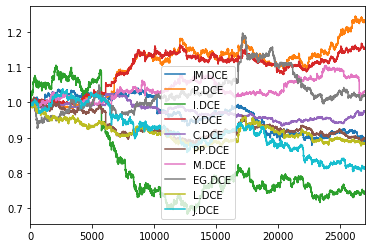

In [4]:
data = c/c.iloc[0]
data.plot()
plt.show()

## Leverage

Multiply price relatives with leverage ratios

In [5]:
# print(data.head())
# data['JM.DCE'] *= (100/15)   # Coking Coal
# data['P.DCE'] *= 10          # Palm Oil
# data['I.DCE'] *= (100/15)    # Iron ore
# data['Y.DCE'] *= 10          # Soybean Oil
# data['C.DCE'] *= 10          # Corn
# data['PP.DCE'] *= 10         # Polypropylene
# data['M.DCE'] *= (100/11)    # Soybean Meal
# data['EG.DCE'] *= (100/12)   # Ethylene Glycol
# data['L.DCE'] *= 10          # Plastic
# data['J.DCE'] *= (100/15)    # Coke
# print(data.head())

In [6]:
# print(result.summary())
# result.plot(weights=False, assets=False, ucrp=True, logy=True)

In [7]:
# swensen_allocation = [0.3, 0.15, 0.1, 0.15, 0.15, 0.15]  

#list all the algos
olps_algos = [
# algos.Anticor(),
algos.BAH(),
algos.BCRP(),
# algos.BNN(),
# algos.CORN(),
algos.CRP(), 
algos.CWMR(),
algos.EG(),
# algos.Kelly(),
algos.OLMAR(),
algos.ONS(),
algos.PAMR(),
algos.RMR(),
# algos.UP()
]

In [8]:
# put all the algos in a dataframe
algo_names = [a.__class__.__name__ for a in olps_algos]
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos

In [9]:
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    olps_train.ix[name,'results'] = alg.run(data)

2019-11-18 21:27:37,660 Running BAH...
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/algo.py:231: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  init_val = s.ix[s.first_valid_index()]
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/algos/bah.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  w.ix[0] = 1./S.shape[1]
2019-11-18 21:27:37,700 BAH finished successfully.
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See t

In [10]:
# Let's make sure the fees are set to 0 at first
for k, r in olps_train.results.iteritems():
#     print(k, r)
    r.fee = 1e-4

/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/result.py:95: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  fees.iloc[0] = self.B.ix[0]


In [11]:
# we need 14 colors for the plot
n_lines = 12
color_idx = np.linspace(0, 1, n_lines)
cmap = plt.cm.coolwarm
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.linspace(0, 1, n_lines)))
plt.rc('axes', prop_cycle=(mpl.cycler(color=cmap(np.linspace(0, 1, n_lines)))))


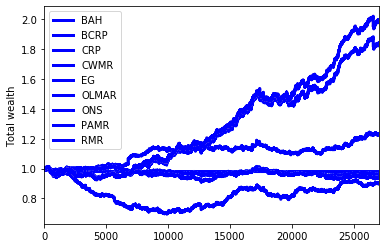

In [12]:
# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
ax = olps_train.results[0].plot(assets=False, weights=False, ucrp=False, portfolio_label=olps_train.index[0])
ax[0].set_prop_cycle(mpl.cycler(color=cmap(np.linspace(0, 1, n_lines))))
for k, r in olps_train.results.iteritems():
    if k == olps_train.results.keys()[0]: # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])
# plt.legend(loc='best')
plt.show()

In [13]:
def olps_stats(dff):
    df = pd.DataFrame()
    for name, r in dff.results.iteritems():
        df.ix[name,'profit'] = r.profit_factor
        df.ix[name,'sharpe'] = r.sharpe
        df.ix[name,'information'] = r.information
        df.ix[name,'annualized_return'] = r.annualized_return * 100
        df.ix[name,'drawdown_period'] = r.drawdown_period
        df.ix[name,'winning_pct'] = r.winning_pct * 100
        df.ix[name, 'VaR(90%)'] = r.var90
        df.ix[name, 'VaR(95%)'] = r.var95
        df.ix[name, 'VaR(99%)'] = r.var99
    return df

In [14]:
olps_stats(olps_train)


/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-depre

,profit,sharpe,information,annualized_return,drawdown_period,winning_pct,VaR(90%),VaR(95%),VaR(99%)
BAH,0.988735,-0.062258,0.041783,-0.034774,21368.0,49.476217,-0.000452,-0.000580,-0.000820
BCRP,1.033917,0.167108,0.216863,0.195514,7834.0,49.684851,-0.000936,-0.001203,-0.001705
CRP,0.987875,-0.067896,-1.339487,-0.038625,21368.0,49.468814,-0.000461,-0.000591,-0.000835
CWMR,0.898626,-0.083686,0.032055,-0.018387,26715.0,46.920290,-0.000178,-0.000228,-0.000323
EG,0.987907,-0.067678,-0.349830,-0.038454,21368.0,49.465112,-0.000460,-0.000590,-0.000834
OLMAR,1.076634,0.373330,0.456886,0.570053,7276.0,52.979971,-0.001207,-0.001555,-0.002209
ONS,0.986325,-0.078819,-0.058415,-0.061821,21368.0,49.442902,-0.000636,-0.000815,-0.001152
PAMR,0.987605,-0.066402,-0.047236,-0.099066,26715.0,47.993130,-0.001209,-0.001551,-0.002191
RMR,1.087414,0.423848,0.514315,0.647074,6909.0,52.869234,-0.001203,-0.001551,-0.002204
